# Decision Tree Classification
Decision Tree is also called as CART - Classification and Regression Tree

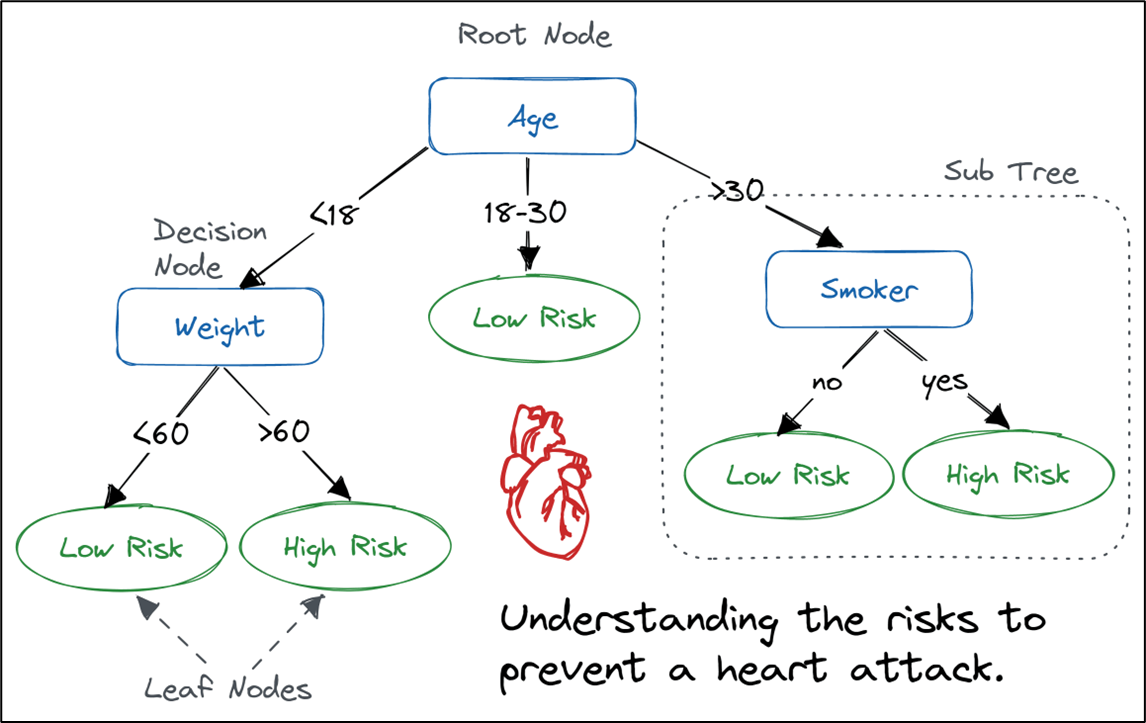

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read the train dataset

In [2]:
import pandas as pd 
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2: Perform Basic Data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

### Step 3: Seperate X and Y(species)

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

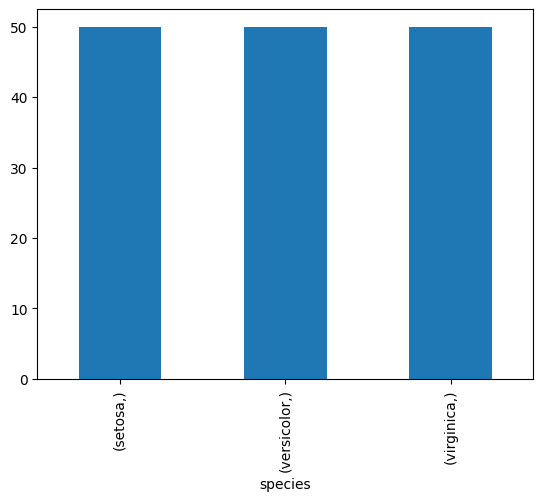

In [10]:
Y.value_counts().plot(kind='bar')

### Step 4: Apply Preprocessing on X

In [11]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), 
                         StandardScaler()).set_output(transform='pandas')

In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Step 5: Apply Train Test split
test - 0.33

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, 
                                                test_size=0.33, random_state=42)

In [20]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [21]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [22]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [23]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [24]:
xtrain.shape

(100, 4)

In [25]:
xtest.shape

(50, 4)

### Step 6: Model Building

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="entropy"
)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [27]:
model.score(xtrain, ytrain)

0.66

In [28]:
model.score(xtest, ytest)

0.68

### Hyperparameter tuning
GridSearchCV

In [30]:
params = {
    "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_split" : [5, 6, 7, 8, 9],
    "min_samples_leaf": [5, 6, 7, 8, 9],
    "criterion" : ["gini", "entropy"]
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [32]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [33]:
gscv.best_score_

np.float64(0.9223826173826174)

In [34]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5)

### Model Evaluation

In [35]:
best_dtc.score(xtrain, ytrain)

0.96

In [36]:
best_dtc.score(xtest, ytest)

1.0

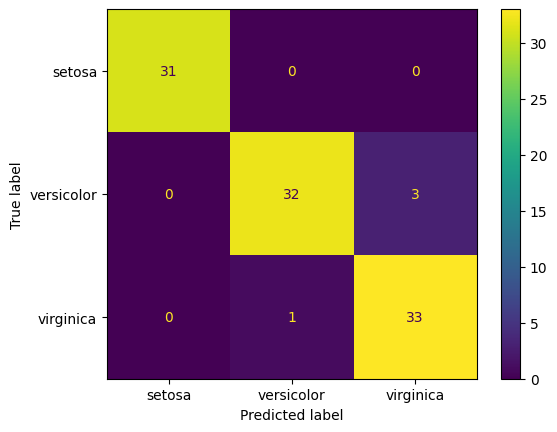

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc, xtrain, ytrain)

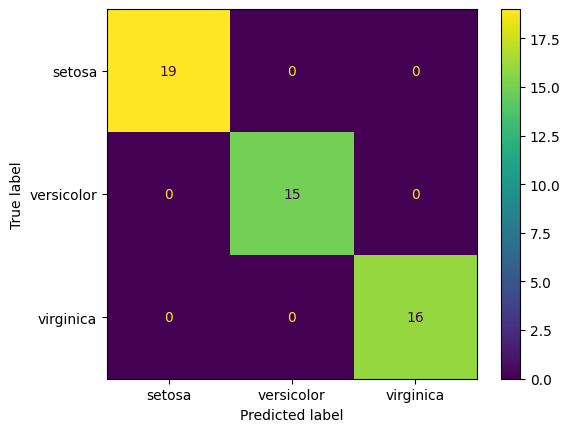

In [39]:
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [46]:
ypred_train = best_dtc.predict(xtrain)
ypred_test = best_dtc.predict(xtest)

In [47]:
ypred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [48]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [49]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [50]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring='f1_macro')
scores

array([1.        , 0.80952381, 0.90277778, 0.95213675, 0.94747475])

In [53]:
scores.mean()

np.float64(0.9223826173826174)

### Above model is good because it has 0.9224 5 fold CV f1 score > 0.8

In [54]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

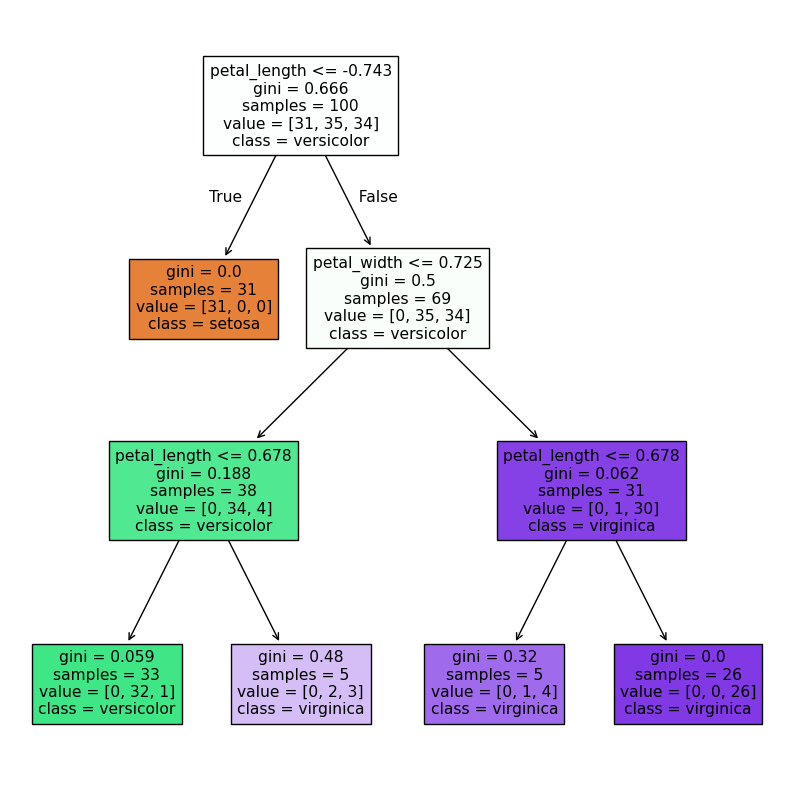

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plot_tree(best_dtc, 
          feature_names=xtrain.columns, 
          class_names=model.classes_,
          filled=True)
plt.show()

In [57]:
ytrain.value_counts()

species   
versicolor    35
virginica     34
setosa        31
Name: count, dtype: int64

In [58]:
best_dtc.feature_importances_

array([0.        , 0.        , 0.58114906, 0.41885094])

In [59]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [60]:
imp = pd.Series(
    best_dtc.feature_importances_,
    index=xtrain.columns
)

In [61]:
imp

sepal_length    0.000000
sepal_width     0.000000
petal_length    0.581149
petal_width     0.418851
dtype: float64

In [62]:
imp.sort_values(ascending=False)

petal_length    0.581149
petal_width     0.418851
sepal_width     0.000000
sepal_length    0.000000
dtype: float64

<Axes: >

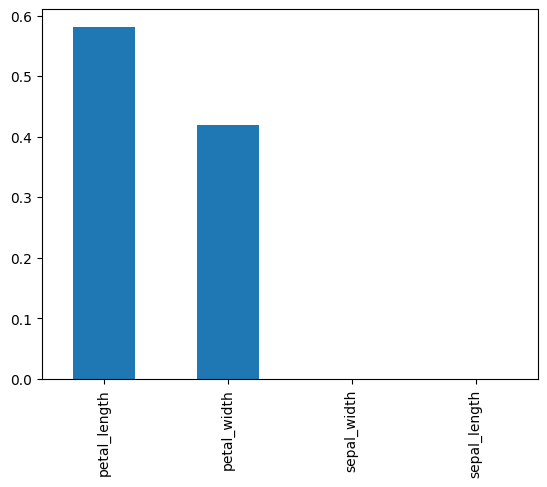

In [63]:
imp.sort_values(ascending=False).plot(kind='bar')

### Out of sample prediction

In [64]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [65]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [67]:
xnew_pre = num_pipe.transform(xnew)

In [68]:
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [71]:
preds = best_dtc.predict(xnew_pre)
probs = best_dtc.predict_proba(xnew_pre)

In [72]:
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [74]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [73]:
probs

array([[0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.4       , 0.6       ]])

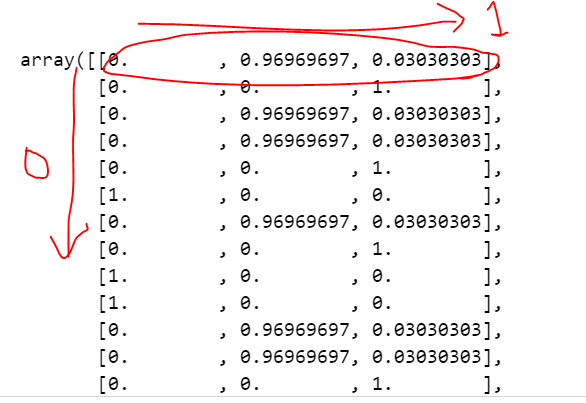

In [75]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ,
       1.        , 0.96969697, 1.        , 1.        , 1.        ,
       0.96969697, 0.96969697, 1.        , 0.96969697, 0.6       ])

### Save above results to dataframe

In [76]:
xnew['species_pred'] = preds
xnew['probability'] = max_probs

In [77]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,probability
0,5.5,2.5,4.0,1.3,versicolor,0.969697
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,0.969697
3,4.4,2.9,NaN,0.2,versicolor,0.969697
4,5.9,3.0,5.1,1.8,virginica,1.000000
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,0.969697
7,6.5,3.0,5.2,2.0,virginica,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


In [78]:
xnew.to_csv("DTCResults.csv", index=False)